##Introduction
This project implements a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The project demonstrates the complete machine learning pipeline including data preprocessing, model building, training, and evaluation.



##Table of Contents

*   Library Imports & Setup
*   Data Loading and Preprocessing
*   Exploratory Data Analysis
*   Model Architecture
*   Training Pipeline
*   Model Evaluation
*   Results Visualization

##1. Library Imports & Setup
In this section, we import all necessary libraries for our deep learning project:

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [19]:
# Deep learning imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

###Key Components:




*   NumPy and Pandas for data manipulation
*   Matplotlib and Seaborn for visualization
*   TensorFlow/Keras for deep learning
*   Scikit-learn for evaluation metrics
*   Random seeds for reproducibility



In [3]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

##2. Data Loading and Preprocessing
The data preprocessing pipeline includes:

In [11]:
def load_and_preprocess_data():
    """
    Load CIFAR-10 dataset and preprocess it for training.
    Returns preprocessed training and testing data.
    """
    try:
        # Load CIFAR-10 dataset
        print("Loading CIFAR-10 dataset...")
        (X_train, y_train), (X_test, y_test) = cifar10.load_data()

        # Normalize pixel values to be between 0 and 1
        X_train = X_train.astype('float32') / 255.0
        X_test = X_test.astype('float32') / 255.0

        # Convert labels to categorical
        y_train = to_categorical(y_train, 10)
        y_test = to_categorical(y_test, 10)

        return X_train, X_test, y_train, y_test

    except Exception as e:
        print(f"Error in loading and preprocessing data: {str(e)}")
        raise

###Key Steps:

*  Data Loading: Using Keras' built-in CIFAR-10 dataset
*  Normalization: Scaling pixel values to [0,1] range
*  Label Encoding: Converting to one-hot encoded format
*  Error Handling: Try-except blocks for robust execution







##3. Exploratory Data Analysis (EDA)
The EDA function visualizes and analyzes the dataset:

In [12]:
def perform_eda(X_train, y_train):
    """
    Perform exploratory data analysis on the dataset.
    Visualize sample images and distribution of classes.
    """
    try:
        # Display information about the dataset
        print("\nDataset Overview:")
        print(f"Training set shape: {X_train.shape}")
        print(f"Number of classes: {y_train.shape[1]}")

        # Plot sample images
        plt.figure(figsize=(10, 10))
        for i in range(9):
            plt.subplot(3, 3, i+1)
            plt.imshow(X_train[i])
            plt.axis('off')
        plt.suptitle('Sample Images from CIFAR-10')
        plt.show()

        # Plot class distribution
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                      'dog', 'frog', 'horse', 'ship', 'truck']
        class_counts = np.sum(y_train, axis=0)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=class_names, y=class_counts)
        plt.title('Class Distribution in Training Set')
        plt.xticks(rotation=45)
        plt.show()

    except Exception as e:
        print(f"Error in performing EDA: {str(e)}")
        raise

###Visualization Components:

**Dataset Overview:**
*   Training set shape
*   Number of classes
*   Data distribution

**Sample Images:**


*   3x3 grid of random images
*   Visual inspection of data quality

**Class Distribution:**


*   Bar plot of class frequencies
*   Check for class imbalance






##4. Model Architecture
The CNN architecture is designed for optimal image classification:

In [13]:
def build_cnn_model():
    """
    Build and return a CNN model architecture.
    """
    try:
        model = models.Sequential([
            # First Convolutional Block
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
            layers.BatchNormalization(),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Second Convolutional Block
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Third Convolutional Block
            layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Dense Layers
            layers.Flatten(),
            layers.Dense(512, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(10, activation='softmax')
        ])

        return model

    except Exception as e:
        print(f"Error in building CNN model: {str(e)}")
        raise


###Architecture Breakdown:

**First Convolutional Block:**



*   32 filters, 3x3 kernel
*   ReLU activation
*   Batch Normalization
*   MaxPooling
*   Dropout (0.25)

**Second Convolutional Block:**


*   64 filters, 3x3 kernel
*   Same pattern as first block
*   Increased feature depth

**Third Convolutional Block:**



*   Further feature extraction
*   Final spatial reduction






**Dense Layers:**


*   Flattening operation
*   512 neurons with ReLU
*   Final 10-way softmax









##5. Training Pipeline
The training process includes:

In [14]:
def train_model(model, X_train, y_train, X_test, y_test):
    """
    Train the CNN model with early stopping and model checkpointing.
    Returns training history.
    """
    try:
        # Create models directory if it doesn't exist
        os.makedirs('models', exist_ok=True)

        # Compile the model
        model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

        # Define callbacks
        checkpoint = ModelCheckpoint(
            filepath='models/best_model.keras',  # Updated extension to .keras
            monitor='val_accuracy',
            save_best_only=True,
            mode='max',
            verbose=1
        )

        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )

        # Train the model
        history = model.fit(
            X_train, y_train,
            batch_size=64,
            epochs=50,
            validation_split=0.2,
            callbacks=[checkpoint, early_stopping],
            verbose=1
        )

        return history

    except Exception as e:
        print(f"Error in training model: {str(e)}")
        raise


###Training Configuration:

**Model Compilation:**

*   Optimizer: Adam
*   Loss: Categorical Crossentropy
*   Metric: Accuracy

**Callbacks:**



*   ModelCheckpoint: Saves best model
*   EarlyStopping: Prevents overfitting
*   Validation split: 20%


**Training Parameters:**


*   Batch size: 64

*   Epochs: 50 (with early stopping)
*   Validation monitoring







##6. Model Evaluation
Evaluation metrics and visualizations:

In [15]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print various metrics.
    """
    try:
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test, axis=1)

        # Print classification report
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                      'dog', 'frog', 'horse', 'ship', 'truck']
        print("\nClassification Report:")
        print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

        # Plot confusion matrix
        plt.figure(figsize=(12, 8))
        cm = confusion_matrix(y_test_classes, y_pred_classes)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names,
                    yticklabels=class_names)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.show()

    except Exception as e:
        print(f"Error in evaluating model: {str(e)}")
        raise


###Evaluation Components:

**Classification Report:**

*   Precision
*   Recall
*   F1-Score
*   Support

**Confusion Matrix:**


*   Visual representation

*   Class-wise performance

*   Error analysis






##7. Results Visualization
Training history visualization:

In [16]:
def plot_training_history(history):
    """
    Plot training and validation accuracy/loss curves.
    """
    try:
        # Plot training history
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Accuracy plot
        ax1.plot(history.history['accuracy'], label='Training Accuracy')
        ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()

        # Loss plot
        ax2.plot(history.history['loss'], label='Training Loss')
        ax2.plot(history.history['val_loss'], label='Validation Loss')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in plotting training history: {str(e)}")
        raise

###Visualization Details:

**Accuracy Plot:**


*   Training vs Validation

*   Model learning progress
*   Overfitting detection

**Loss Plot:**


*   Training vs Validation

*   Convergence analysis
*   Training stability







##Running the Complete Pipeline
Execute the entire project:

Starting Image Classification Project...
Loading CIFAR-10 dataset...

Dataset Overview:
Training set shape: (50000, 32, 32, 3)
Number of classes: 10


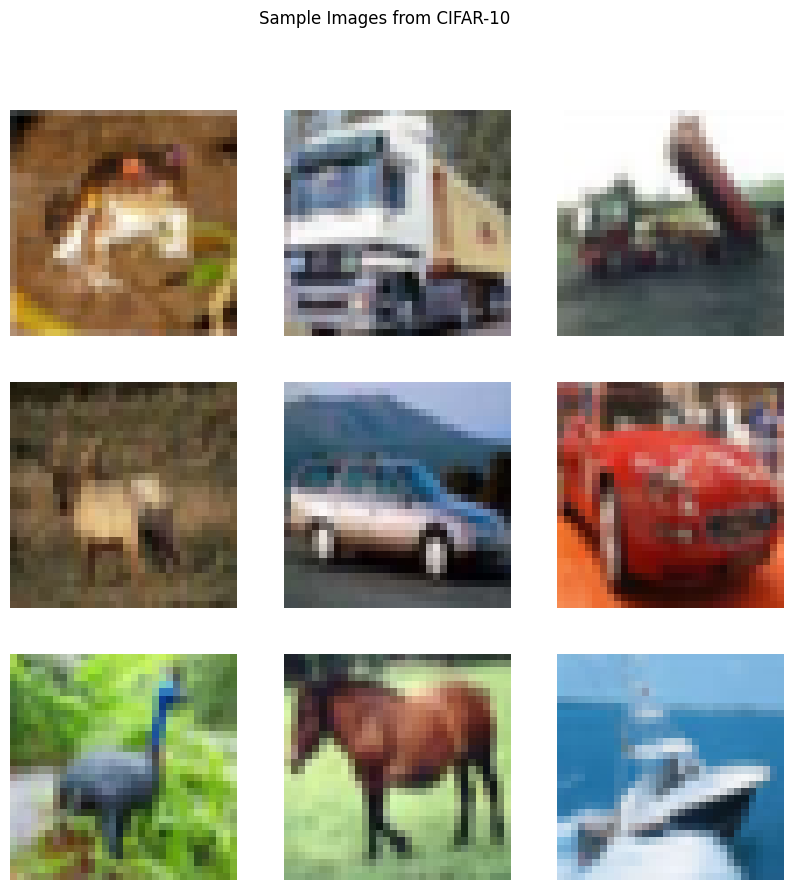

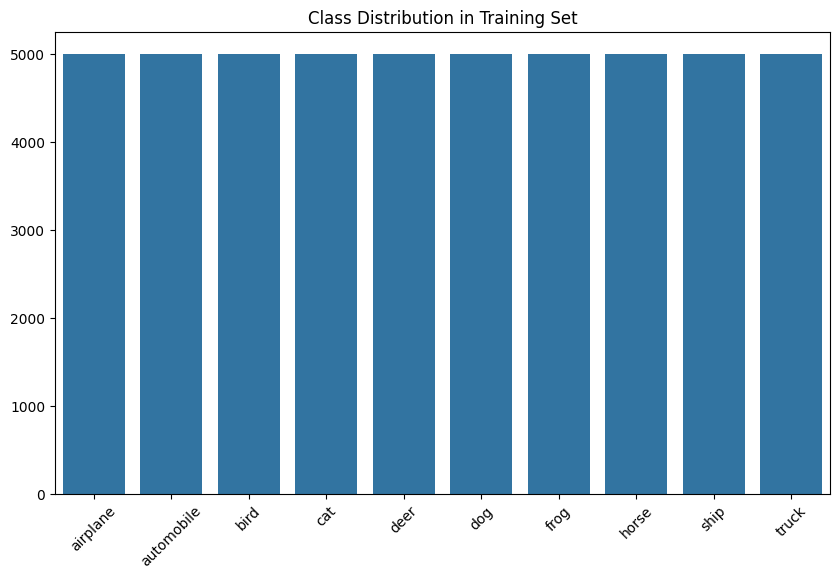


Model Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)


Training model...
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.3637 - loss: 2.0730
Epoch 1: val_accuracy improved from -inf to 0.53290, saving model to models/best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 392s 618ms/step - accuracy: 0.3638 - loss: 2.0724 - val_accuracy: 0.5329 - val_loss: 1.3406
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.5940 - loss: 1.1556
Epoch 2: val_accuracy improved from 0.53290 to 0.66390, saving model to models/best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 383s 613ms/step - accuracy: 0.5940 - loss: 1.1555 - val_accuracy: 0.6639 - val_loss: 0.9508
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.6792 - loss: 0.9167
Epoch 3: val_accuracy improved from 0.66390 to 0.70130, saving model to models/best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 440s 610ms/step - accuracy: 0.6792 - loss: 0.9167 - val_accuracy: 0.7013 - val_loss: 0.8397
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.7

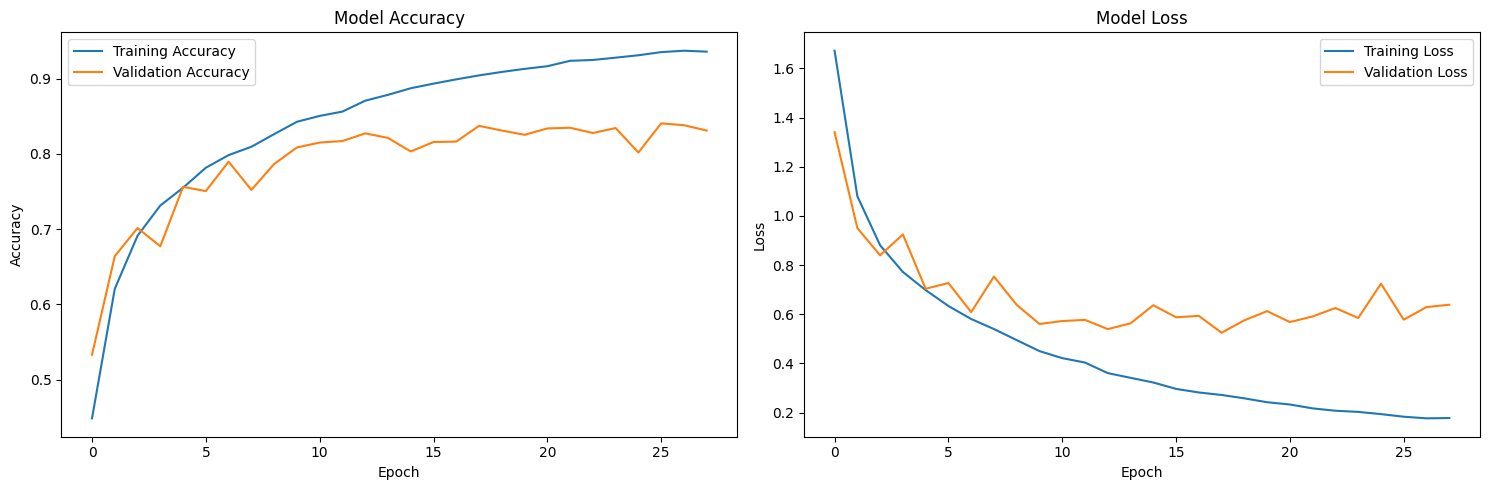


Evaluating model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 87ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.86      0.85      1000
  automobile       0.87      0.94      0.90      1000
        bird       0.75      0.77      0.76      1000
         cat       0.78      0.59      0.68      1000
        deer       0.78      0.84      0.81      1000
         dog       0.75      0.76      0.75      1000
        frog       0.87      0.89      0.88      1000
       horse       0.83      0.90      0.86      1000
        ship       0.95      0.85      0.90      1000
       truck       0.88      0.90      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



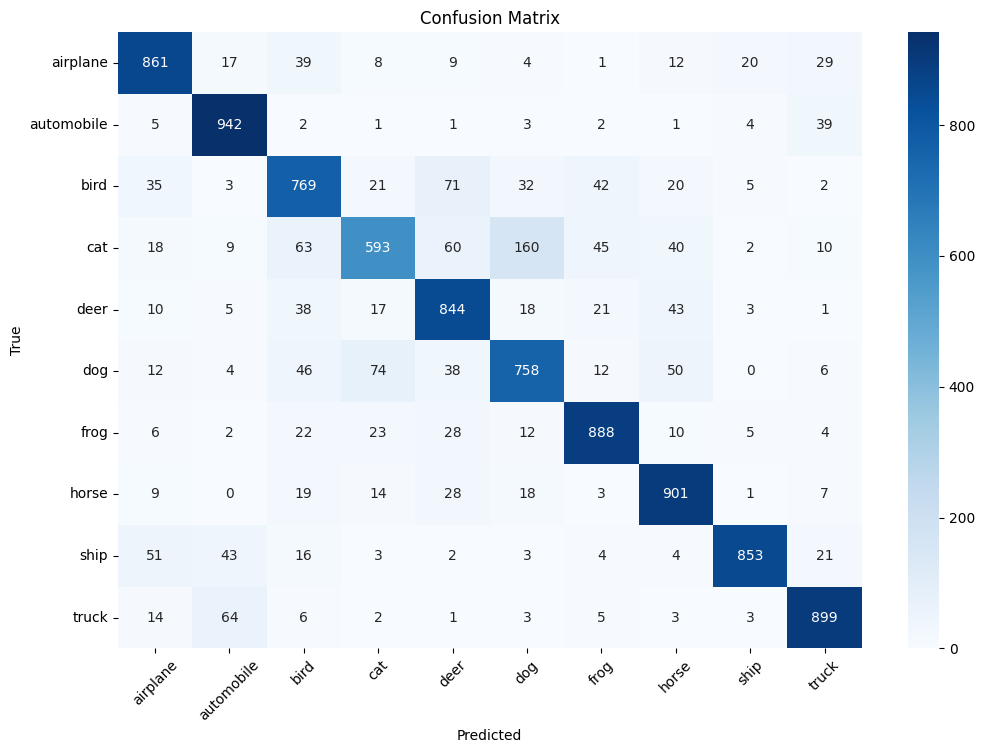


Total execution time: 3:10:11.390120


In [20]:
def main():
    """
    Main function to run the entire pipeline.
    """
    try:
        print("Starting Image Classification Project...")
        start_time = datetime.now()

        # Load and preprocess data
        X_train, X_test, y_train, y_test = load_and_preprocess_data()

        # Perform EDA
        perform_eda(X_train, y_train)

        # Build and train model
        model = build_cnn_model()
        print("\nModel Summary:")
        model.summary()

        # Train model
        print("\nTraining model...")
        history = train_model(model, X_train, y_train, X_test, y_test)

        # Plot training history
        plot_training_history(history)

        # Evaluate model
        print("\nEvaluating model...")
        evaluate_model(model, X_test, y_test)

        # Print total execution time
        end_time = datetime.now()
        print(f"\nTotal execution time: {end_time - start_time}")

    except Exception as e:
        print(f"An error occurred in the main function: {str(e)}")
        raise

if __name__ == "__main__":
    main()

###Pipeline Steps:

*   Load and preprocess data
*   Perform EDA
*   Build and compile model
*   Train model
*   Evaluate performance
*   Visualize results

###Future Improvements

**Data Augmentation:**

*   Random rotations
*   Horizontal flips
*   Zoom variations

**Model Enhancements:**

*   Learning rate scheduling
*   Different architectures
*   Hyperparameter tuning

**Additional Features:**

*   Cross-validation
*   Model ensemble
*   Prediction visualization

**Requirements**

*   Python 3.7+
*   TensorFlow 2.x
*   NumPy
*   Pandas
*   Matplotlib
*   Seaborn
*   Scikit-learn


##Conclusion
This project demonstrates a complete deep learning pipeline for image classification, implementing best practices in model architecture, training, and evaluation. The modular structure allows for easy modifications and improvements.